In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/CS229

Mounted at /content/drive
/content/drive/MyDrive/CS229


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr, spearmanr
import numpy as np

DATA_DIR_LOAD = "datasets"
def load_ticker_data(ticker) -> pd.DataFrame:
    file_path = os.path.join(DATA_DIR_LOAD, f"{ticker}_volatility.csv")
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No data file found for {ticker} in file path {file_path}. Please generate it first.")
    data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    print(f"Data for {ticker} loaded from {file_path}")
    return data

In [ ]:
# picking AAPL to do feature engineering
TICKER = "AAPL"
df_orig = load_ticker_data(TICKER)
df_orig

Data for AAPL loaded from datasets/AAPL_volatility.csv


<ipython-input-3-15d2ae247fbd>:14: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv(file_path, index_col=0, parse_dates=True)


,Date,Adj Close,Close,High,Low,Open,Volume,Daily Return,Volatility,Daily Variation,...,14-Day EMA,Close % Change,Close Change,RSI,MACD,Stochastic Oscillator,ATR,+DI,-DI,ADX
0,2006-04-03,1.887436,2.237500,2.290000,2.236071,2.273929,815791200,-0.001117,37.580955,0.023716,...,1.885398,-0.001117,-0.002110,32.639210,-0.050799,-0.464975,0.388732,2.318830,3.032995,38.195627
1,2006-04-04,1.842849,2.184643,2.222143,2.180357,2.217857,931924000,-0.023623,36.775443,0.018841,...,1.879724,-0.023623,-0.044587,31.719391,-0.049887,-0.657662,0.383935,2.331097,3.049040,35.998695
2,2006-04-05,2.024814,2.400357,2.400357,2.291071,2.311071,2233408800,0.098741,50.803122,0.047288,...,1.899070,0.098741,0.181965,58.073430,-0.034088,-0.102224,0.395614,4.413886,2.938352,34.101562
3,2006-04-06,2.146225,2.544286,2.573214,2.435714,2.439286,2663768800,0.059962,54.526099,0.056369,...,1.932024,0.059962,0.121411,65.203432,-0.011637,0.168588,0.405981,6.235960,2.888112,33.164977
4,2006-04-07,2.102542,2.492500,2.543214,2.445357,2.533214,1545238800,-0.020353,54.137818,0.038630,...,1.954760,-0.020353,-0.043683,62.935044,0.002602,0.083532,0.406490,6.235100,3.000550,32.148866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,2020-12-23,128.059891,130.960007,132.429993,130.779999,132.160004,88223700,-0.006976,25.904805,0.012485,...,123.547267,-0.006976,-0.899612,67.005941,3.099252,0.554691,4.615443,10.916447,22.933715,23.915147
3709,2020-12-24,129.047516,131.970001,133.460007,131.100006,131.320007,54930100,0.007712,25.849395,0.017971,...,124.280634,0.007712,0.987625,70.334723,3.263447,0.623949,4.812415,11.860068,22.730088,24.665143
3710,2020-12-28,133.662979,136.690002,137.339996,133.509995,133.990005,124486200,0.035766,27.753573,0.028584,...,125.531613,0.035766,4.615463,73.856902,3.723085,0.786096,5.045647,15.143028,19.311719,24.340599
3711,2020-12-29,131.883316,134.869995,138.789993,134.339996,138.050003,121047300,-0.013315,28.708110,0.032235,...,126.378507,-0.013315,-1.779663,68.527084,3.898804,0.629470,5.128260,16.374522,18.101181,23.516231


In [ ]:
df_orig.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Daily Return', 'Volatility', 'Daily Variation', '7-Day SMA',
       '7-Day STD', 'SMA + 2STD', 'SMA - 2STD', 'High-Close', 'Low-Open',
       'Cumulative Return', '14-Day EMA', 'Close % Change', 'Close Change',
       'RSI', 'MACD', 'Stochastic Oscillator', 'ATR', '+DI', '-DI', 'ADX'],
      dtype='object')

In [ ]:
# normalize data for feature engineering
df_orig_nums = df_orig.drop(columns=['Date'])
y = df_orig['Volatility']

scaler = StandardScaler()
standardized_features = scaler.fit_transform(df_orig_nums)
df_norm = pd.DataFrame(standardized_features, columns=df_orig_nums.columns)
features_df = df_norm.drop(columns=['Volatility'])
y_norm = df_norm['Volatility']

In [ ]:
features_df.head()

,Adj Close,Close,High,Low,Open,Volume,Daily Return,Daily Variation,7-Day SMA,7-Day STD,...,14-Day EMA,Close % Change,Close Change,RSI,MACD,Stochastic Oscillator,ATR,+DI,-DI,ADX
0,-0.925100,-0.973575,-0.970636,-0.974737,-0.972254,0.973518,-0.119749,0.048631,-0.929979,-0.579660,...,-0.931652,-0.119749,-0.048455,-1.334727,-0.324644,0.214667,-1.671446,-0.546077,-0.497670,1.197394
1,-0.926936,-0.975715,-0.973349,-0.977022,-0.974524,1.271787,-1.210088,-0.259578,-0.929763,-0.583553,...,-0.931890,-1.210088,-0.104359,-1.386037,-0.323566,-0.033574,-1.675707,-0.542260,-0.493175,1.025852
2,-0.919442,-0.966985,-0.966223,-0.972482,-0.970750,4.614448,4.717931,1.538765,-0.928387,-0.545845,...,-0.931080,4.717931,0.193804,0.084048,-0.304888,0.682002,-1.665334,0.105805,-0.524182,0.877719
3,-0.914442,-0.961160,-0.959311,-0.966550,-0.965558,5.719761,2.839236,2.112828,-0.926148,-0.498669,...,-0.929700,2.839236,0.114110,0.481775,-0.278345,1.030892,-1.656127,0.672748,-0.538255,0.804588
4,-0.916241,-0.963256,-0.960510,-0.966154,-0.961755,2.846991,-1.051678,0.991406,-0.924815,-0.480953,...,-0.928748,-1.051678,-0.103169,0.355239,-0.261513,0.921313,-1.655675,0.672480,-0.506758,0.725248


# Feature Correlation Inspection

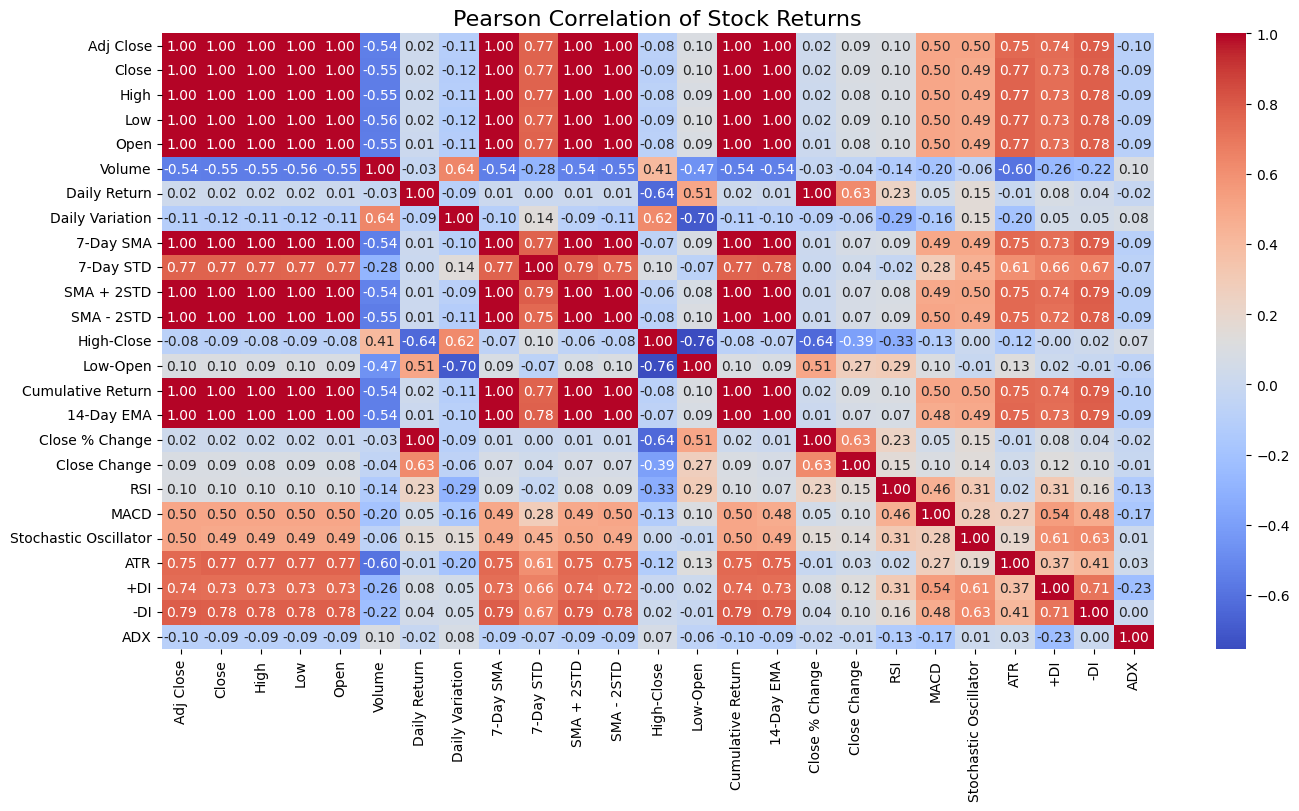

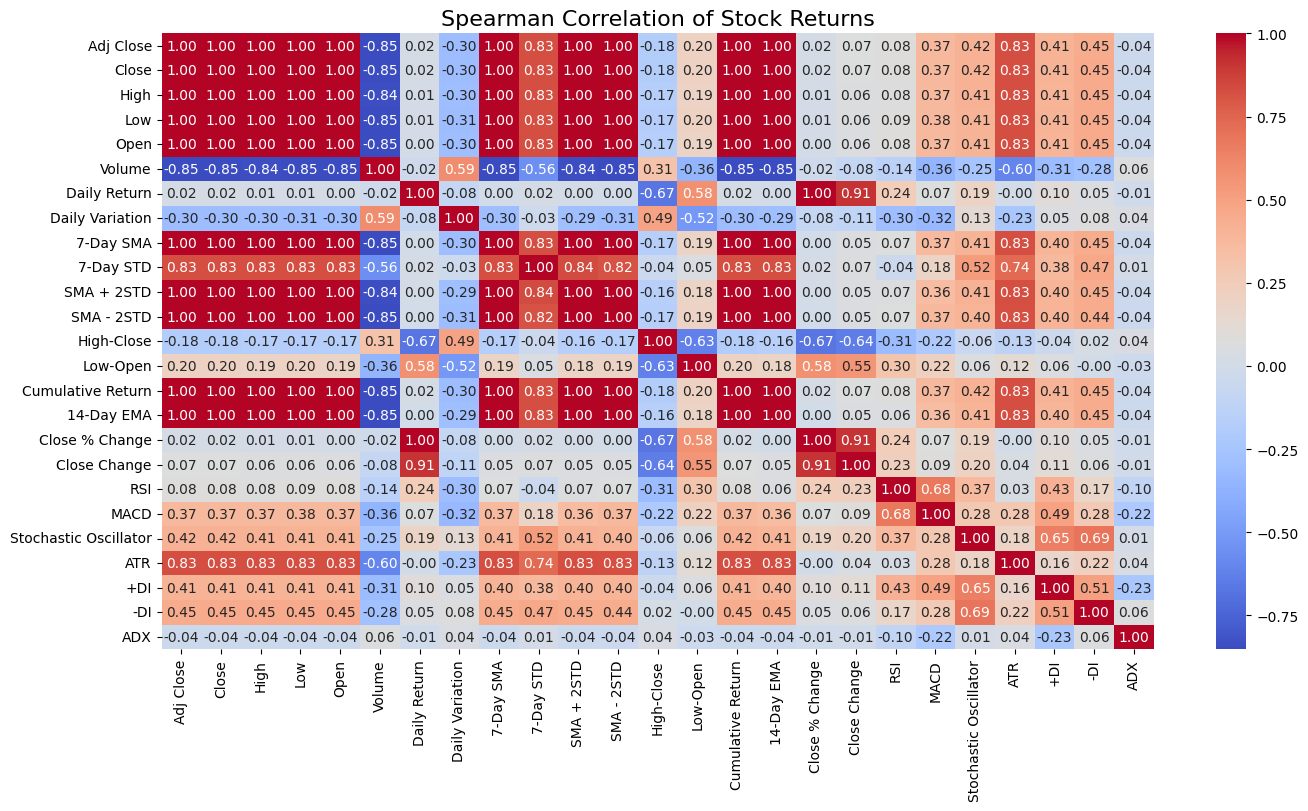

In [ ]:
pearson_corr = features_df.corr()
spearman_corr = features_df.corr(method='spearman')

plt.figure(figsize=(16, 8))
sns.heatmap(pearson_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Pearson Correlation of Stock Returns', fontsize=16)
plt.show()

plt.figure(figsize=(16, 8))
sns.heatmap(spearman_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Spearman Correlation of Stock Returns', fontsize=16)
plt.show()

# Mutual Information

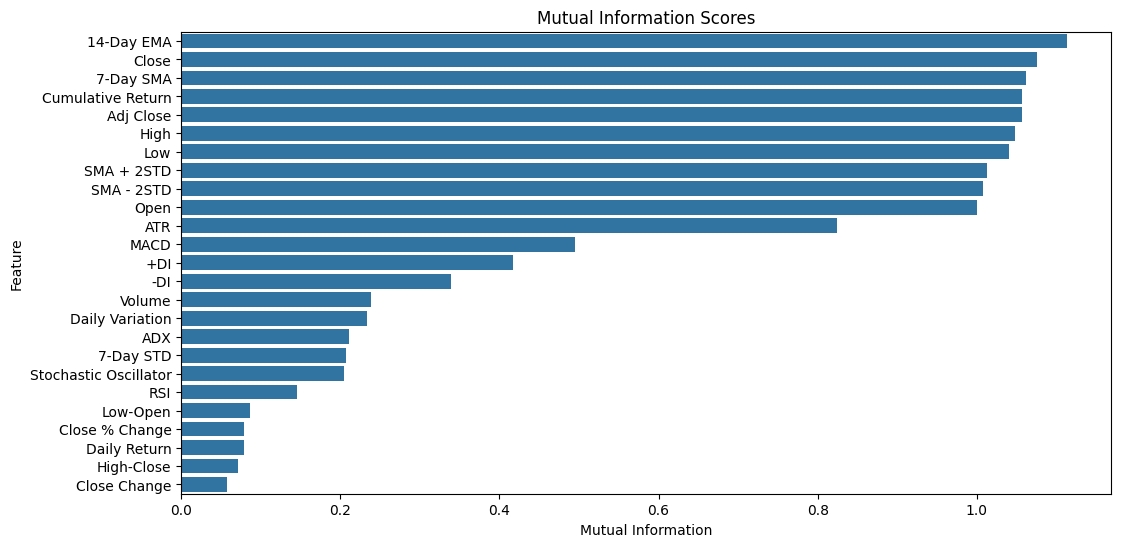

Top features based on mutual information: ['14-Day EMA', 'Close', '7-Day SMA', 'Cumulative Return', 'Adj Close', 'High', 'Low', 'SMA + 2STD', 'SMA - 2STD', 'Open', 'ATR', 'MACD', '+DI', '-DI']


In [ ]:
from sklearn.feature_selection import mutual_info_regression

# compute mutual information
mi_scores = mutual_info_regression(features_df, y_norm, random_state=42)
mi_df = pd.DataFrame({'Feature': features_df.columns, 'Mutual Information': mi_scores})
mi_df.sort_values(by='Mutual Information', ascending=False, inplace=True)

# plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Mutual Information', y='Feature', data=mi_df)
plt.title('Mutual Information Scores')
plt.show()

# select top features
top_features = mi_df['Feature'].head(14).tolist()
print(f"Top features based on mutual information: {top_features}")

In [ ]:
# drop features with correlation = 1. pick only one with highest mi to keep (14-day EMA)
filtered_features = features_df.drop(columns=['Adj Close', 'Close', 'High', 'Low', 'Open', '7-Day SMA', 'SMA + 2STD', 'SMA - 2STD', 'Cumulative Return'])

# Run PCA on filtered features

In [ ]:
# drop features with low mutual information (volume and below), but keep daily returns
filtered_features = filtered_features.drop(columns=['Volume', 'Daily Variation', 'ADX', '7-Day STD', 'Stochastic Oscillator', 'RSI', 'Low-Open', 'Close % Change', 'High-Close', 'Close Change'])

# also tried dropping daily returns
# filtered_features = filtered_features.drop(columns=['Volume', 'Daily Variation', 'ADX', '7-Day STD', 'Stochastic Oscillator', 'RSI', 'Daily Return', 'Low-Open', 'Close % Change', 'High-Close', 'Close Change'])

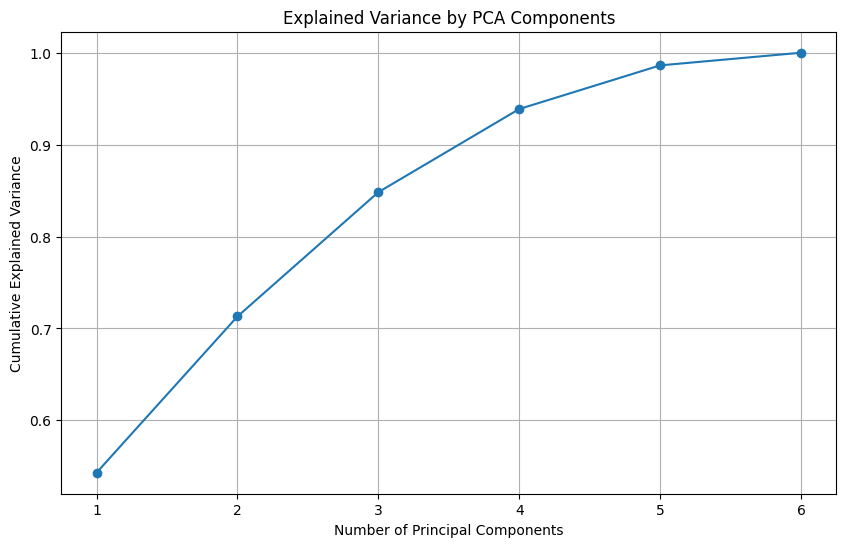

Number of components explaining 90% variance: 4


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# apply PCA
pca = PCA()
X_pca = pca.fit_transform(filtered_features)

# visualize explained variance ratio
explained_variance = pca.explained_variance_ratio_.cumsum()
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Select number of components explaining 90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components}")

**Reduce to principal Components**

In [ ]:
# Reduce features to principal components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(filtered_features)

# Convert reduced components to a DataFrame
X_reduced_df = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
print(f"Reduced feature set (PCA components):\n{X_reduced_df.head()}")

Reduced feature set (PCA components):
        PC1       PC2       PC3       PC4
0 -1.738680  0.267026 -0.995736 -0.404078
1 -1.772565 -0.764288 -1.343302 -0.440732
2 -1.274359  4.924571  0.349126 -0.441027
3 -1.064395  3.209551 -0.396231 -0.650382
4 -1.172768 -0.473967 -1.631052 -0.768591


In [ ]:
# access the PCA components (weights for each feature in each principal component)
pca_components = pca.components_

# create dfto map components to original features
pca_weights_df = pd.DataFrame(
    pca_components,
    columns=filtered_features.columns,
    index=[f'PC{i+1}' for i in range(n_components)]  # principal component names
)

# Display the PCA weights
print("PCA Feature Weights:")
print(pca_weights_df)


PCA Feature Weights:
     Daily Return  14-Day EMA      MACD       ATR       +DI       -DI
PC1      0.033442    0.521327  0.369248  0.380858  0.468234  0.475877
PC2      0.947454   -0.112772  0.142352 -0.236707  0.112648  0.025109
PC3      0.314078    0.231286 -0.552469  0.675937 -0.262807 -0.129155
PC4      0.029778   -0.083045  0.721006  0.389712 -0.322034 -0.465602


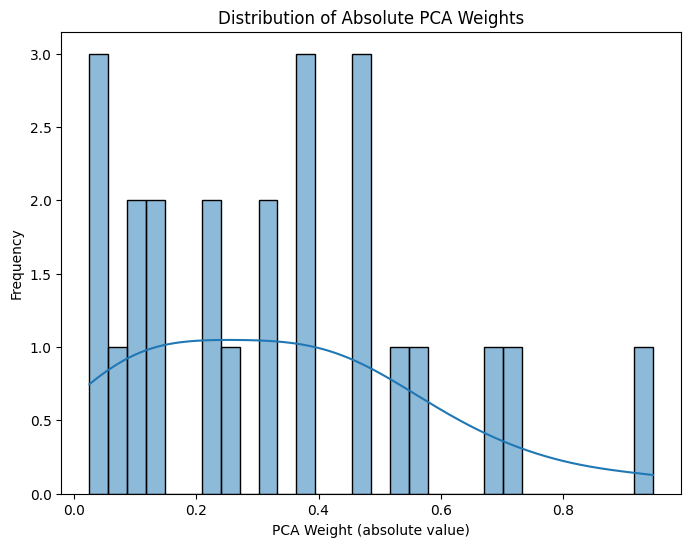

In [ ]:
# Flatten PCA weights into a single array for all components
loadings = pca_weights_df.abs().values.flatten()

# Visualize the distribution of absolute PCA weights
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(loadings, bins=30, kde=True)
plt.title("Distribution of Absolute PCA Weights")
plt.xlabel("PCA Weight (absolute value)")
plt.ylabel("Frequency")
plt.show()


In [ ]:
threshold = 0.5 # threshold for considering component
top_features_per_pc = {}
for pc in pca_weights_df.index:
    # Filter features by absolute value of their weights
    top_features = pca_weights_df.loc[pc][pca_weights_df.loc[pc].abs() >= threshold].index
    top_features_per_pc[pc] = top_features.tolist()

# Display the selected features
print("Top Contributing Features for Each Principal Component (Threshold Based):")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")

Top Contributing Features for Each Principal Component (Threshold Based):
PC1: ['14-Day EMA']
PC2: ['Daily Return']
PC3: ['MACD', 'ATR']
PC4: ['MACD']


Analysis: Interestingly, PCA did not do much reduction, so we can proceed with all the filtered features

# Final Feature Selection

In [ ]:
pca_vals = [x for xs in list(top_features_per_pc.values()) for x in xs]
pca_features = list(set(pca_vals))
print(pca_features)

['ATR', 'Daily Return', 'MACD', '14-Day EMA']


Correlation Matrix:
                   ATR  Daily Return      MACD  14-Day EMA
ATR           1.000000     -0.010210  0.269931    0.754080
Daily Return -0.010210      1.000000  0.049956    0.007268
MACD          0.269931      0.049956  1.000000    0.476467
14-Day EMA    0.754080      0.007268  0.476467    1.000000


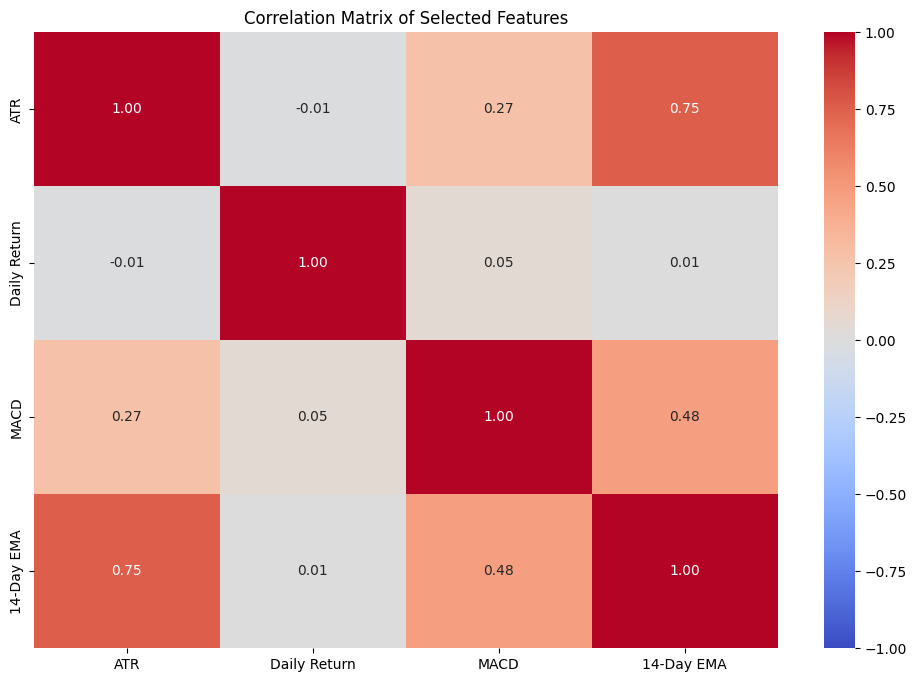

In [ ]:
# look at correlation between variables

pca_filtered = features_df[pca_features]

correlation_matrix = pca_filtered.corr()
print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix of Selected Features")
plt.show()